## Life Cycle of a Machine Learning Project

### Understanding the Problem Statement

* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-processing
* Model Training
* Choose best model


### Problem Statement

This dataset comprises of features for a motor insurance claim, our job is to check whether the claim made was actually Fraud or not. Its a classification problem statement.

### 1. Data Collection

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
## load the data as pandas dataframe

df = pd.read_csv("data/insurance_claims.csv")

In [10]:
## Show top 5 records

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
## Shape of the data

df.shape

(1000, 40)

We have 1000 records and 40 columns in the dataset

In [12]:
## Summary of the numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [13]:
## Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Observation - 

There are no values in column `_c39` we can remove it, we can see some missing values in `authorities_contacted` as well

In [14]:
## Let's create a new copy without _c39

df = df.drop(columns=['_c39'], axis=1)

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


We can drop `policy_number` , `policy_bind_date` as well as it does'nt seem any relevance

In [16]:
df = df.drop(columns=['policy_number', 'policy_bind_date'], axis=1)

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [17]:
## define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

print("----------------------------------------------------------------------------------")

print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 17 numerical features: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
----------------------------------------------------------------------------------
We have 20 categorical features: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [18]:
## proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------------------------")

OH    35.2
IL    33.8
IN    31.0
Name: policy_state, dtype: float64
----------------------------------------
250/500     35.1
100/300     34.9
500/1000    30.0
Name: policy_csl, dtype: float64
----------------------------------------
FEMALE    53.7
MALE      46.3
Name: insured_sex, dtype: float64
----------------------------------------
JD             16.1
High School    16.0
Associate      14.5
MD             14.4
Masters        14.3
PhD            12.5
College        12.2
Name: insured_education_level, dtype: float64
----------------------------------------
machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service        7.1
priv-house-serv      7.1
armed-forces         6.9
adm-clerical         6.5
protective-serv      6.3
handlers-cleaners    5.4
farming-fishing      5.3
Name: insured_occupation, dtype: float64
----------------------------------------
re

In [19]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [20]:
## Checking the duplicate columns
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  0
Unique values per column:


months_as_customer              391
age                              46
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

There are no duplicate records in the dataset

In [21]:
## Checking for null values

df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

There are 91 missing values in authorities_contacted

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix "uni" means "one", The purpose of univariate analysis is to understand the distribution of values for a single variable

### Univariate analysis of numerical features

In [22]:
def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

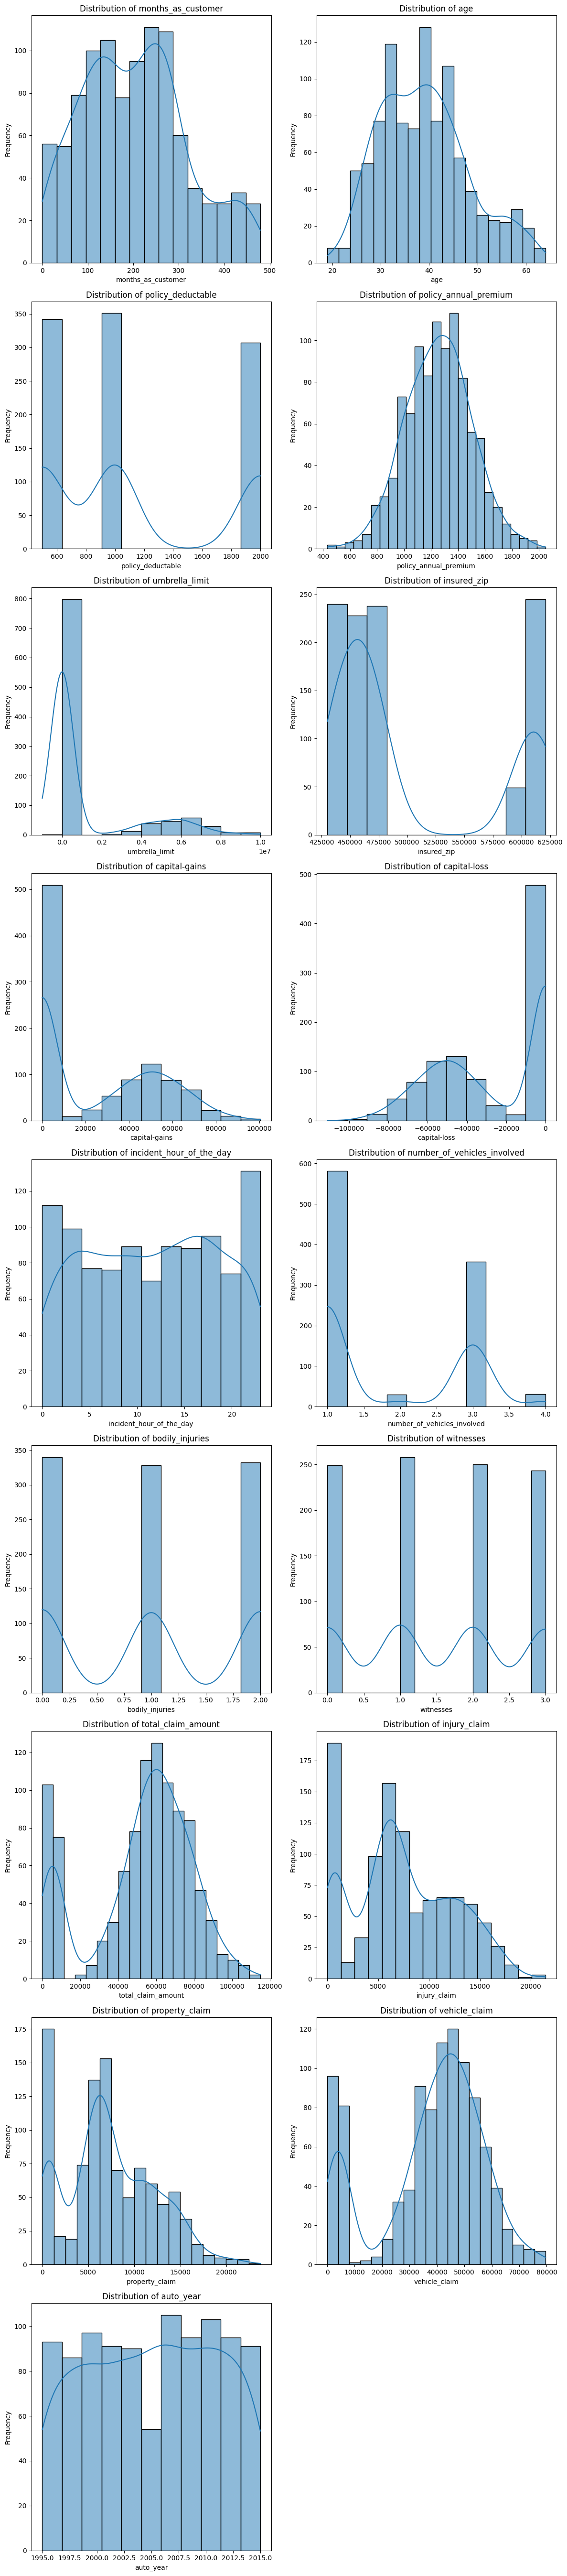

In [23]:
visualize_numerical_features(df)

### Report

* most of the features follows normal distribution, but also has outliers

In [24]:
## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    cat_cols = len(categorical_features.columns)
    cat_rows = (cat_cols // 2) + (cat_cols % 2)

    fig, axes = plt.subplots(cat_rows, 2, figsize=(12, 6*cat_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if cat_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()

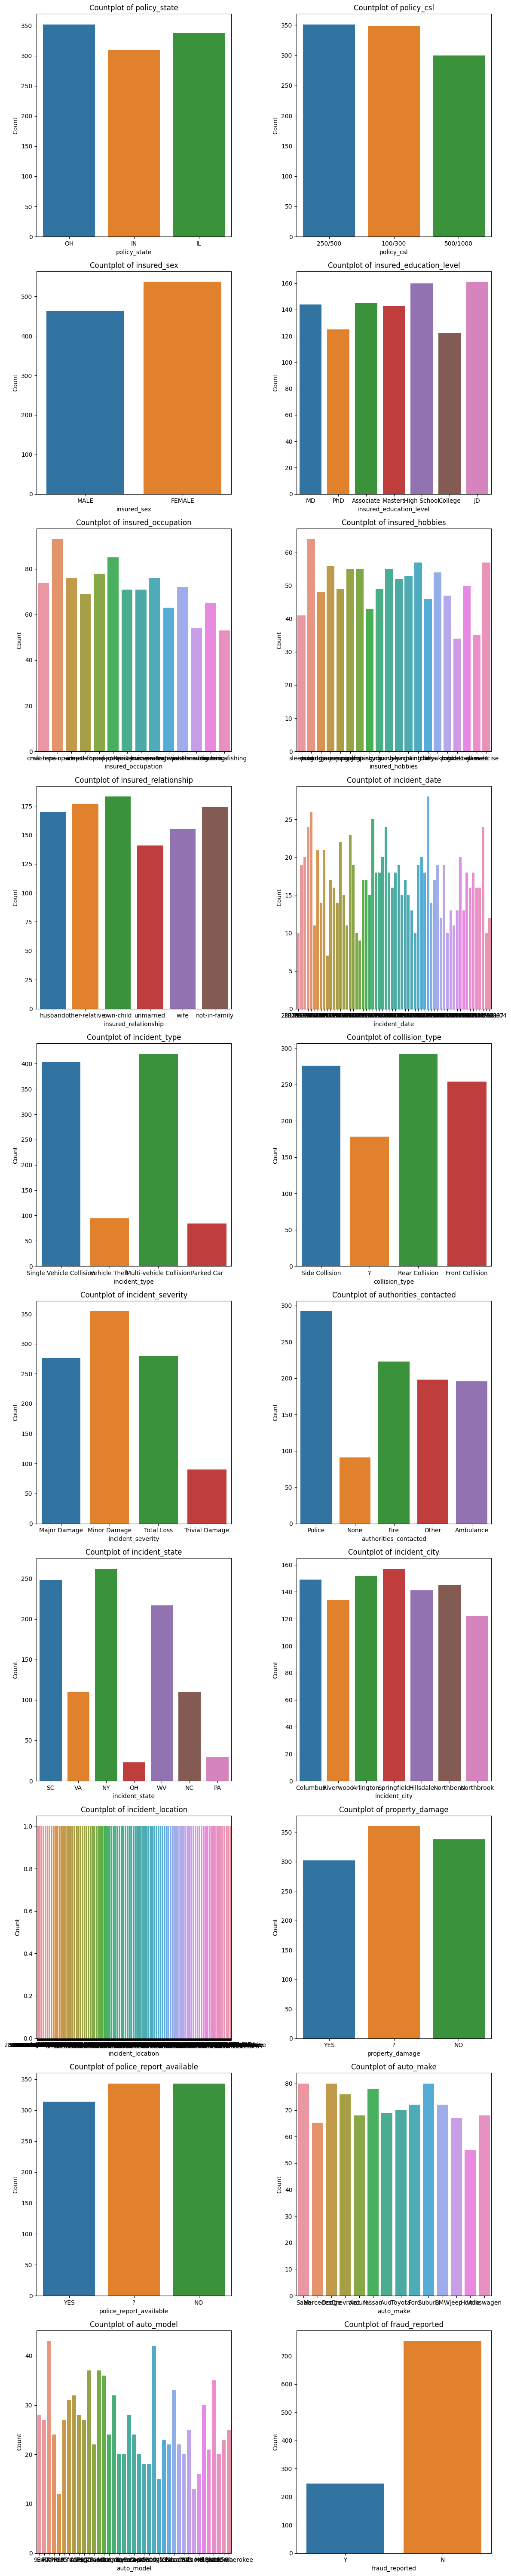

In [25]:
visualize_categorical_features(df)

### Report

* Most of the policies are from policy_state `OH`
* policy_csl has equal values in `250/500` and `100/300`
* More than 500 customers are Female
* education level has different categories, maximum are with `high_school` and 'JD`
* insured_occupation has categories 
* insured_hobbies have categories
* most of the customers are parents
* most of the incident type are of multi vehicle collision
* count of collision type is Rear collision
* most of the incidents happened are of Minor Damage
* customers mostly contacted the police
* most of the incidents happend in `NY`
* most of property_damage are unknown
* most of the police report available are also unknown
* more than 700+ customers claims are not reported False.

### Multivariate Analysis

Multivariate Analysis is the analysis of more than one variable

In [26]:
numeric_features

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [27]:
categorical_features

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [28]:
df_cat = df.select_dtypes(include="object").columns


In [29]:
df_cat

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [30]:
for col in df_cat:
    if df[col].nunique() <=20:
        display(pd.crosstab(df['fraud_reported'], df[col], normalize=True))

policy_state,IL,IN,OH
fraud_reported,,,
N,0.261,0.231,0.261
Y,0.077,0.079,0.091


policy_csl,100/300,250/500,500/1000
fraud_reported,,,
N,0.259,0.259,0.235
Y,0.090,0.092,0.065


insured_sex,FEMALE,MALE
fraud_reported,,
N,0.411,0.342
Y,0.126,0.121


insured_education_level,Associate,College,High School,JD,MD,Masters,PhD
fraud_reported,,,,,,,
N,0.111,0.090,0.124,0.119,0.106,0.111,0.092
Y,0.034,0.032,0.036,0.042,0.038,0.032,0.033


insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,0.054,0.052,0.052,0.048,0.037,0.043,0.071,0.059,0.059,0.067,0.049,0.055,0.056,0.051
Y,0.011,0.017,0.022,0.028,0.016,0.011,0.022,0.012,0.012,0.018,0.014,0.021,0.022,0.021


insured_hobbies,base-jumping,basketball,board-games,bungie-jumping,camping,chess,cross-fit,dancing,exercise,golf,hiking,kayaking,movies,paintball,polo,reading,skydiving,sleeping,video-games,yachting
fraud_reported,,,,,,,,,,,,,,,,,,,,
N,0.036,0.028,0.034,0.047,0.050,0.008,0.009,0.038,0.046,0.049,0.040,0.049,0.046,0.044,0.034,0.047,0.038,0.033,0.04,0.037
Y,0.013,0.006,0.014,0.009,0.005,0.038,0.026,0.005,0.011,0.006,0.012,0.005,0.009,0.013,0.013,0.017,0.011,0.008,0.01,0.016


insured_relationship,husband,not-in-family,other-relative,own-child,unmarried,wife
fraud_reported,,,,,,
N,0.135,0.129,0.125,0.144,0.107,0.113
Y,0.035,0.045,0.052,0.039,0.034,0.042


incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
fraud_reported,,,,
N,0.305,0.076,0.286,0.086
Y,0.114,0.008,0.117,0.008


collision_type,?,Front Collision,Rear Collision,Side Collision
fraud_reported,,,,
N,0.162,0.184,0.201,0.206
Y,0.016,0.070,0.091,0.070


incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
fraud_reported,,,,
N,0.109,0.316,0.244,0.084
Y,0.167,0.038,0.036,0.006


authorities_contacted,Ambulance,Fire,None,Other,Police
fraud_reported,,,,,
N,0.139,0.163,0.085,0.135,0.231
Y,0.057,0.060,0.006,0.063,0.061


incident_state,NC,NY,OH,PA,SC,VA,WV
fraud_reported,,,,,,,
N,0.076,0.204,0.013,0.022,0.175,0.085,0.178
Y,0.034,0.058,0.010,0.008,0.073,0.025,0.039


incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
fraud_reported,,,,,,,
N,0.108,0.110,0.106,0.111,0.095,0.104,0.119
Y,0.044,0.039,0.035,0.034,0.027,0.030,0.038


property_damage,?,NO,YES
fraud_reported,,,
N,0.257,0.272,0.224
Y,0.103,0.066,0.078


police_report_available,?,NO,YES
fraud_reported,,,
N,0.254,0.257,0.242
Y,0.089,0.086,0.072


auto_make,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
fraud_reported,,,,,,,,,,,,,,
N,0.055,0.048,0.052,0.055,0.06,0.050,0.041,0.056,0.043,0.064,0.062,0.061,0.057,0.049
Y,0.013,0.021,0.020,0.021,0.02,0.022,0.014,0.011,0.022,0.014,0.018,0.019,0.013,0.019


fraud_reported,N,Y
fraud_reported,,
N,0.753,0.000
Y,0.000,0.247


### Check multicollinearity in the dataset

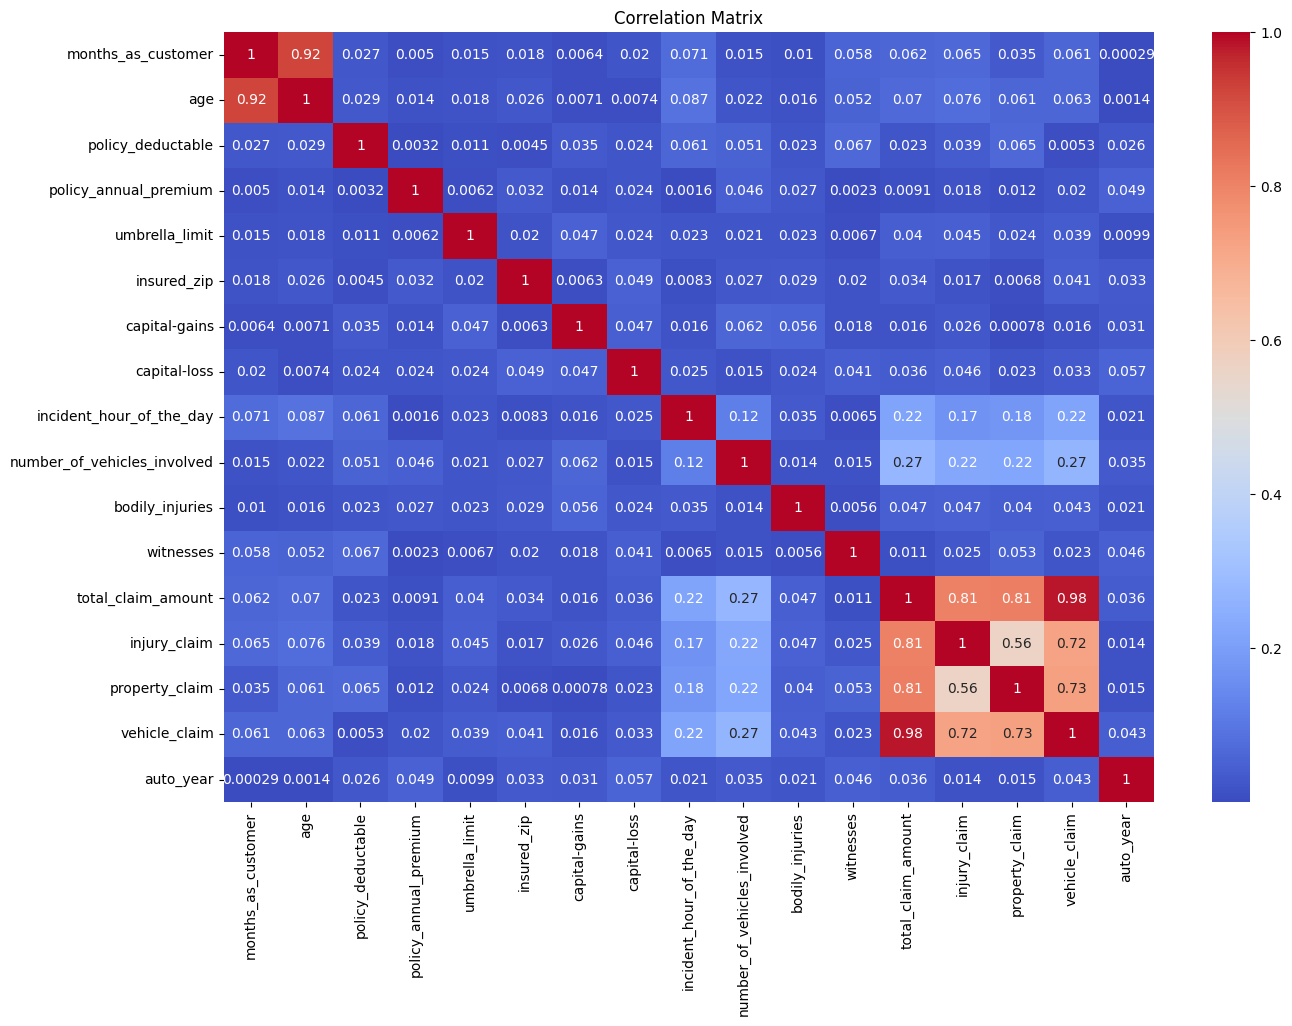

Multicollinear columns: {'injury_claim', 'total_claim_amount', 'vehicle_claim', 'property_claim', 'months_as_customer', 'age'}


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features



multicollinear_cols = check_multicollinearity(df)
print("Multicollinear columns:", multicollinear_cols)

### Reports

* We can remove those columns which are multicorrelated 

In [32]:
## remove few features 

df = df.drop(columns=['months_as_customer', 'property_claim', 'age', 'policy_csl'], axis=1)

df.head(3)

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,...,1,2,YES,71610,6510,52080,Saab,92x,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,0,0,?,5070,780,3510,Mercedes,E400,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,...,2,3,NO,34650,7700,23100,Dodge,RAM,2007,N


In [33]:
df.isnull().sum()

policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
vehicle_claim                  0
auto_make                      0
auto_model

In [34]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [35]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [36]:
## Check for missing values

df.isnull().sum()

policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
vehicle_claim                  0
auto_make                      0
auto_model

There are no missing values we can proceed with the encoding

In [37]:
final_df = df.copy()

final_df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,...,1,2,YES,71610,6510,52080,Saab,92x,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,0,0,?,5070,780,3510,Mercedes,E400,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,...,2,3,NO,34650,7700,23100,Dodge,RAM,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,1,2,NO,63400,6340,50720,Chevrolet,Tahoe,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,...,0,1,NO,6500,1300,4550,Accura,RSX,2009,N


In [40]:
colum_name =[]
unique_value=[]

# Iterate through the columns
for col in final_df:
    if final_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(final_df[col].nunique())
        
table= pd.DataFrame()
table['col_name'] = colum_name
table['value']= unique_value
            
table=table.sort_values('value',ascending=False)
table

,col_name,value
13,incident_location,1000
6,incident_date,60
17,auto_model,39
4,insured_hobbies,20
3,insured_occupation,14
16,auto_make,14
2,insured_education_level,7
11,incident_state,7
12,incident_city,7
5,insured_relationship,6


In [41]:
## Let's drop those columns which have more unique values than 7

final_df.drop(columns=['incident_location', 'incident_date', 'auto_model', 'insured_hobbies',
                                 'insured_occupation'], axis=1, inplace=True)

In [42]:
final_df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,YES,1,2,YES,71610,6510,52080,Saab,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,?,0,0,?,5070,780,3510,Mercedes,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,NO,2,3,NO,34650,7700,23100,Dodge,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,50720,Chevrolet,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,4550,Accura,2009,N


In [43]:
%pwd

'D:\\collab_projects\\insurance_claims\\notebook'

In [44]:
os.chdir("./data/")

In [45]:
final_df.to_csv('insurance_data.csv', index=False)

In [46]:
df = pd.read_csv("insurance_data.csv")

In [47]:
df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,YES,1,2,YES,71610,6510,52080,Saab,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,?,0,0,?,5070,780,3510,Mercedes,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,NO,2,3,NO,34650,7700,23100,Dodge,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,50720,Chevrolet,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,4550,Accura,2009,N


Yes: 247, No: 753


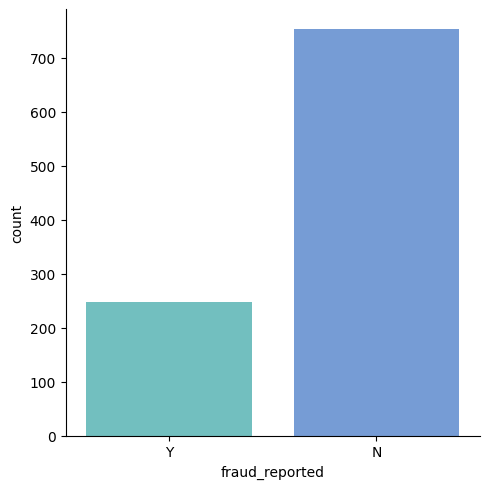

In [49]:
yes = df[df['fraud_reported']=='Y'].shape[0]
no = df[df['fraud_reported']=='N'].shape[0]
print("Yes: " + str(yes) + ", No: " + str(no))
sns.catplot(data=df, x="fraud_reported", kind="count", palette="winter_r", alpha=.6)
plt.show()

#### Report

* The target classes are highly imbalanced
* Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
* If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
* Hence we should handle imbalanced data with certain methods.

#### How to handle Imbalance Data ?

* Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. 
* The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
* SMOTE: Synthetic Minority Oversampling Technique
* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
* Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
* It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

#### Create functions for Model Training and evaluation

In [50]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

#### Plot Visualization of Numerical features

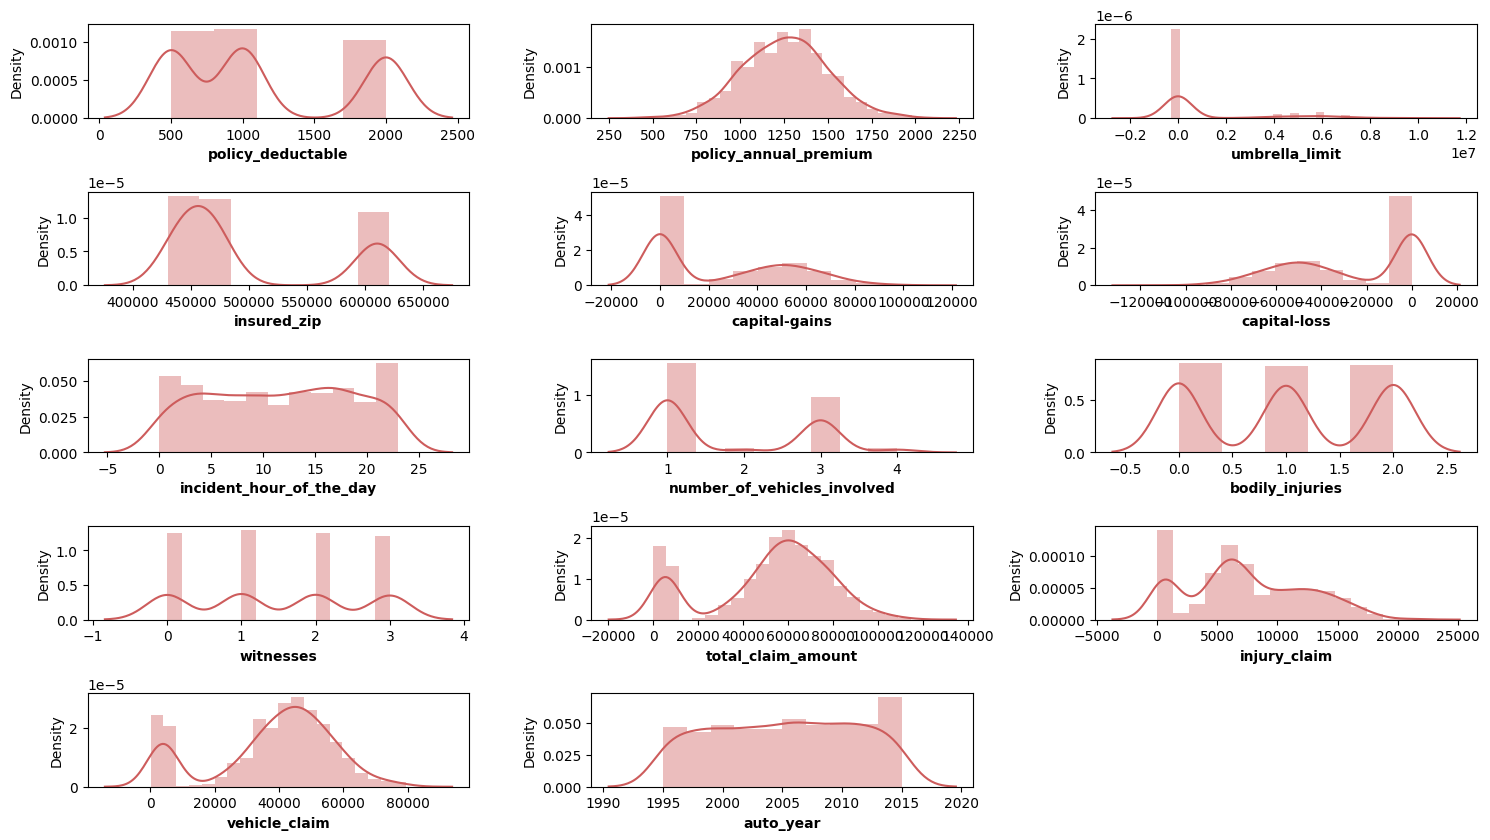

In [52]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report

* As per the above plot most of the features are not normally distributed.
* Transformation of data is not of prime importance since it is a classification problem.
* Interpreting each and every column is not necessary as this is sensor data.

#### Evaluate Model on Different experiments

In [53]:
df.columns

Index(['policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'vehicle_claim', 'auto_make', 'auto_year', 'fraud_reported'],
      dtype='object')

In [54]:
# Splitting X and y for all Experiments
X= df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

#### Manually encoding Target variable

In [55]:
y= y.replace({'Y': 1, 'N': 0})

### Experiment: 1 = KNN Imputer for Null values

#### Why Robust scaler and not Standard scaler?

* Scaling the data using Robust scaler
* Since most of the independent variables are not normally distributed we cannot use Standardscaler

#### Why Robust Scaler and not Minmax?

* because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
* This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [59]:
X.columns

Index(['policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'vehicle_claim', 'auto_make', 'auto_year'],
      dtype='object')

In [62]:
## Define numerical and categorical features

## Numerical features

numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'vehicle_claim', 'auto_year'],
      dtype='object')

In [63]:
## Categorical features

categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'police_report_available',
       'auto_make'],
      dtype='object')

In [69]:
## Encode the categorical features 

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="drop")

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train = transformer.fit_transform(X_train)

In [73]:
X_test = transformer.transform(X_test)

In [75]:
X_train.shape, X_test.shape

((800, 27), (200, 27))

In [83]:
results=[]

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7588)
n_neighbors= 3 || accuracy (0.7588)
n_neighbors= 5 || accuracy (0.7588)
n_neighbors= 7 || accuracy (0.7588)
n_neighbors= 9 || accuracy (0.7588)


We can observe all the n_neighbors having the same accuracy, we'll choose n_neighbors = 3

#### Pipeline for KNN imputer

In [84]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [86]:
X_knn =knn_pipeline.fit_transform(X_test)

#### Handling Imbalanced data

* SMOTE+TOMEK is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
* This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

#### To add new data of minority class

* Choose random data from the minority class.
* Calculate the distance between the random data and its k nearest neighbors.
* Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
* Repeat step number 2–3 until the desired proportion of minority class is met.

#### To remove the tomek links of the majority class

* Choose random data from the majority class.
* If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
* This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [88]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y_test)

In [89]:
X_res, y_res

(array([[-0.5       ,  0.        ,  0.75      , ...,  1.46182918,
          0.67346702, -0.3       ],
        [-0.5       ,  0.        , -0.25      , ..., -0.16175359,
          0.03222441,  0.        ],
        [ 0.        ,  0.        ,  0.25      , ...,  1.08390023,
          0.267764  ,  0.1       ],
        ...,
        [-0.15133401,  0.65133401,  0.6628335 , ..., -0.05590428,
          0.19284678,  0.42106721],
        [-0.40382345,  0.        , -0.75      , ...,  1.08430304,
          0.29588884, -0.3       ],
        [ 0.47026163,  0.        , -0.01486918, ...,  1.3224372 ,
          1.22386227,  0.39405233]]),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 283    1
 284    1
 285    1
 286    1
 287    1
 Name: fraud_reported, Length: 288, dtype: int64)

#### Initialize Default Models in a dictionary

In [92]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains a report of all models metrics with cost
    '''
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models_list = []
    accuracy_list = []
    f1_score_list = []
    precision_list = []
    recall_list = []
    rocauc_score_list = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
        
        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))
        
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

        print('=' * 35)
        print('\n')
        
        accuracy_list.append(model_test_accuracy)
        f1_score_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        rocauc_score_list.append(model_test_rocauc_score)
        
    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_score_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC Score': rocauc_score_list
    }).sort_values(by='Precision', ascending=False)
        
    return report


#### Fit KNN imputed data for models in dictionary

In [109]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8276
- F1 score: 0.8276
- Precision: 0.7500
- Recall: 0.9231
- ROC AUC Score: 0.8365


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7931
- F1 score: 0.8000
- Precision: 0.7059
- Recall: 0.9231
- ROC AUC Score: 0.8053


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8448
- F1 score: 0.8475
- Precision: 0.7576
- Recall: 0.9615
- ROC AUC Score: 0.8558


Logistic Regression
Model performance for Training 

#### Report for KNN Imputed data

In [110]:
report_knn

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
2,Gradient Boosting,0.844828,0.847458,0.757576,0.961538,0.855769
0,Random Forest,0.827586,0.827586,0.750000,0.923077,0.836538
6,CatBoosting Classifier,0.810345,0.819672,0.714286,0.961538,0.824519
1,Decision Tree,0.793103,0.800000,0.705882,0.923077,0.805288
5,XGBClassifier,0.793103,0.806452,0.694444,0.961538,0.808894
7,AdaBoost Classifier,0.758621,0.774194,0.666667,0.923077,0.774038
4,K-Neighbors Classifier,0.620690,0.694444,0.543478,0.961538,0.652644
3,Logistic Regression,0.586207,0.647059,0.523810,0.846154,0.610577


#### Insights

#### For the Experiment 1: 

* Knn imputer has GradientBoosting classifier as the best Model

#### Proceeding with further experiments

#### Experiment: 2 = Simple Imputer with Strategy Median

* SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using a variety of input strategies.
* Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [111]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [112]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X_test)

In [113]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y_test)

In [114]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8621
- F1 score: 0.8621
- Precision: 0.7812
- Recall: 0.9615
- ROC AUC Score: 0.8714


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7759
- F1 score: 0.7797
- Precision: 0.6970
- Recall: 0.8846
- ROC AUC Score: 0.7861


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8448
- F1 score: 0.8475
- Precision: 0.7576
- Recall: 0.9615
- ROC AUC Score: 0.8558


Logistic Regression
Model performance for Training 

#### Report for Simple Imputer with median strategy

In [115]:
report_median

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,Random Forest,0.862069,0.862069,0.781250,0.961538,0.871394
2,Gradient Boosting,0.844828,0.847458,0.757576,0.961538,0.855769
6,CatBoosting Classifier,0.810345,0.819672,0.714286,0.961538,0.824519
1,Decision Tree,0.775862,0.779661,0.696970,0.884615,0.786058
5,XGBClassifier,0.793103,0.806452,0.694444,0.961538,0.808894
7,AdaBoost Classifier,0.758621,0.774194,0.666667,0.923077,0.774038
4,K-Neighbors Classifier,0.620690,0.694444,0.543478,0.961538,0.652644
3,Logistic Regression,0.586207,0.647059,0.523810,0.846154,0.610577


### Insights

#### For the Experiment 2: Simple imputer with median strategy has Random Forest classifier as the best Model

* Proceeding with further experiments

#### Experiment: 3 = MICE for Imputing Null values

* MICE stands for Multivariate Imputation By Chained Equations algorithm
* This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
* ImputationKernel Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [118]:
#!pip install miceforest

In [120]:
import miceforest as mf

X_mice = X_train.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1989
)

In [121]:
X_mice = kernel.complete_data()

In [122]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [123]:
# Fit X with Mice imputer 
X_mice= mice_pipeline.fit_transform(X_test)

In [125]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y_test)

In [126]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8103
- F1 score: 0.8136
- Precision: 0.7273
- Recall: 0.9231
- ROC AUC Score: 0.8209


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7759
- F1 score: 0.7869
- Precision: 0.6857
- Recall: 0.9231
- ROC AUC Score: 0.7897


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8448
- F1 score: 0.8475
- Precision: 0.7576
- Recall: 0.9615
- ROC AUC Score: 0.8558


Logistic Regression
Model performance for Training 

#### Report for MICE Imputer algorithm

In [127]:
report_mice

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
2,Gradient Boosting,0.844828,0.847458,0.757576,0.961538,0.855769
0,Random Forest,0.810345,0.813559,0.727273,0.923077,0.820913
6,CatBoosting Classifier,0.810345,0.819672,0.714286,0.961538,0.824519
5,XGBClassifier,0.793103,0.806452,0.694444,0.961538,0.808894
1,Decision Tree,0.775862,0.786885,0.685714,0.923077,0.789663
7,AdaBoost Classifier,0.758621,0.774194,0.666667,0.923077,0.774038
4,K-Neighbors Classifier,0.620690,0.694444,0.543478,0.961538,0.652644
3,Logistic Regression,0.586207,0.647059,0.523810,0.846154,0.610577


#### Insights

* For the Experiment 3: Mice imputer has GradientBoosting classifier as the best Model

#### Proceeding with further experiments

#### Experiment: 4 = Simple Imputer with Strategy Constant

* Another strategy which can be used is replacing missing values with a fixed (constant) value.
* To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter

In [128]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [129]:
X_const =constant_pipeline.fit_transform(X_test)

In [130]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y_test)

In [131]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8103
- F1 score: 0.8000
- Precision: 0.7586
- Recall: 0.8462
- ROC AUC Score: 0.8137


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7586
- F1 score: 0.7667
- Precision: 0.6765
- Recall: 0.8846
- ROC AUC Score: 0.7704


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8448
- F1 score: 0.8475
- Precision: 0.7576
- Recall: 0.9615
- ROC AUC Score: 0.8558


Logistic Regression
Model performance for Training 

#### Report for Simple Imputer with Constant strategy

In [132]:
report_const

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,Random Forest,0.810345,0.800000,0.758621,0.846154,0.813702
2,Gradient Boosting,0.844828,0.847458,0.757576,0.961538,0.855769
6,CatBoosting Classifier,0.810345,0.819672,0.714286,0.961538,0.824519
5,XGBClassifier,0.793103,0.806452,0.694444,0.961538,0.808894
1,Decision Tree,0.758621,0.766667,0.676471,0.884615,0.770433
7,AdaBoost Classifier,0.758621,0.774194,0.666667,0.923077,0.774038
4,K-Neighbors Classifier,0.620690,0.694444,0.543478,0.961538,0.652644
3,Logistic Regression,0.586207,0.647059,0.523810,0.846154,0.610577


### Insights

### For the Experiment 4: Simple imputer with constant strategy has Random Forest classifier as the best Model

#### Proceeding with further experiments

#### Experiment: 5 = Simple Imputer with Strategy Mean

* Another strategy which can be used is replacing missing values with mean
* Here we replace the missing values with the mean of the column

In [133]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [134]:
X_mean = mean_pipeline.fit_transform(X_test)

In [135]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y_test)

In [136]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7931
- F1 score: 0.7857
- Precision: 0.7333
- Recall: 0.8462
- ROC AUC Score: 0.7981


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7759
- F1 score: 0.7937
- Precision: 0.6757
- Recall: 0.9615
- ROC AUC Score: 0.7933


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8448
- F1 score: 0.8475
- Precision: 0.7576
- Recall: 0.9615
- ROC AUC Score: 0.8558


Logistic Regression
Model performance for Training 

#### Report for Simple imputer with strategy mean

In [137]:
report_mean

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
2,Gradient Boosting,0.844828,0.847458,0.757576,0.961538,0.855769
0,Random Forest,0.793103,0.785714,0.733333,0.846154,0.798077
6,CatBoosting Classifier,0.810345,0.819672,0.714286,0.961538,0.824519
5,XGBClassifier,0.793103,0.806452,0.694444,0.961538,0.808894
1,Decision Tree,0.775862,0.793651,0.675676,0.961538,0.793269
7,AdaBoost Classifier,0.758621,0.774194,0.666667,0.923077,0.774038
4,K-Neighbors Classifier,0.620690,0.694444,0.543478,0.961538,0.652644
3,Logistic Regression,0.586207,0.647059,0.523810,0.846154,0.610577


#### Insights 

#### For the experiment 5 : Simple imputer with strategy mean Gradient Boosting Classifier is the best model


#### Experiment: 5 = Principle component analysis with imputing median

* Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!
* As the dataset has 28 columns we can try PCA and check our metrics

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [140]:
X_pca = pca_pipeline.fit_transform(X_test)

In [141]:
#Applying PCA

var_ratio={}
for n in range(2,28):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

#### Variance Plot

<Axes: >

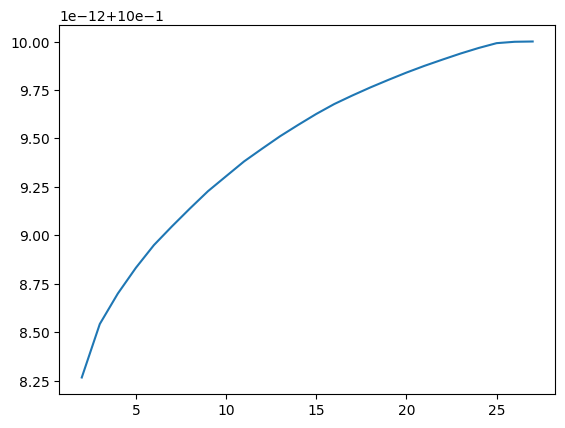

In [142]:
# plotting variance ratio
pd.Series(var_ratio).plot()

#### Kneed algorithm to find the elbow point

In [145]:
#!pip install kneed

<Figure size 500x500 with 0 Axes>

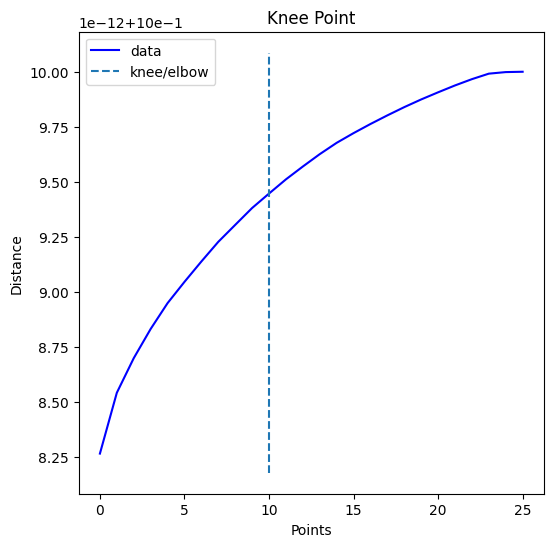

Knee Locator k = 12


In [146]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [147]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=12,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [148]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y_test)

In [149]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7544
- F1 score: 0.7667
- Precision: 0.7419
- Recall: 0.7931
- ROC AUC Score: 0.7537


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6667
- F1 score: 0.6780
- Precision: 0.6667
- Recall: 0.6897
- ROC AUC Score: 0.6663


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7719
- F1 score: 0.7937
- Precision: 0.7353
- Recall: 0.8621
- ROC AUC Score: 0.7703


Logistic Regression
Model performance for Training 

#### Report for PCA and Mean imputed data

In [150]:
report_pca

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,Random Forest,0.754386,0.766667,0.741935,0.793103,0.753695
2,Gradient Boosting,0.771930,0.793651,0.735294,0.862069,0.770320
5,XGBClassifier,0.754386,0.787879,0.702703,0.896552,0.751847
6,CatBoosting Classifier,0.754386,0.787879,0.702703,0.896552,0.751847
1,Decision Tree,0.666667,0.677966,0.666667,0.689655,0.666256
7,AdaBoost Classifier,0.701754,0.738462,0.666667,0.827586,0.699507
4,K-Neighbors Classifier,0.719298,0.771429,0.658537,0.931034,0.715517
3,Logistic Regression,0.526316,0.658228,0.520000,0.896552,0.519704


### Final Model

In [153]:
#!pip install prettytable

In [158]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names = ["Model", "Imputation Method", "Precision", "F1-Score"]
pt.add_row(["GradientBoosting", "Simple Imputer-Constant", "0.75", "0.84"])
pt.add_row(["RandomForest", "Mice", "0.78", "0.86"])  # Fixed line
pt.add_row(["GradientBoosting", "Knn-Imputer", "0.75", "0.84"])  # Fixed line
pt.add_row(["RandomForest", "Simple Imputer-Mean", "0.75", "0.80"])  # Fixed line
pt.add_row(["GradientBoosting", "Median", "0.75", "0.84"])  # Fixed line
pt.add_row(["RandomForest", "PCA", "0.74", "0.76"])  # Fixed line
print(pt)

+------------------+-------------------------+-----------+----------+
|      Model       |    Imputation Method    | Precision | F1-Score |
+------------------+-------------------------+-----------+----------+
| GradientBoosting | Simple Imputer-Constant |    0.75   |   0.84   |
|   RandomForest   |           Mice          |    0.78   |   0.86   |
| GradientBoosting |       Knn-Imputer       |    0.75   |   0.84   |
|   RandomForest   |   Simple Imputer-Mean   |    0.75   |   0.80   |
| GradientBoosting |          Median         |    0.75   |   0.84   |
|   RandomForest   |           PCA           |    0.74   |   0.76   |
+------------------+-------------------------+-----------+----------+


In [159]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names = ["Model", "Imputation Method", "Precision", "F1-Score"]
pt.add_row(["GradientBoosting", "Simple Imputer-Constant", "0.75", "0.84"])
pt.add_row(["RandomForest", "Mice", "0.78", "0.86"])
pt.add_row(["GradientBoosting", "Knn-Imputer", "0.75", "0.84"])
pt.add_row(["RandomForest", "Simple Imputer-Mean", "0.75", "0.80"])
pt.add_row(["GradientBoosting", "Median", "0.75", "0.84"])
pt.add_row(["RandomForest", "PCA", "0.74", "0.76"])

# Find the row with the highest precision
highest_precision_row = max(pt._rows, key=lambda row: float(row[2]))

highest_precision_table = PrettyTable()
highest_precision_table.field_names = pt.field_names
highest_precision_table.add_row(highest_precision_row)

print("Table with Highest Precision:")
print(highest_precision_table)

Table with Highest Precision:
+--------------+-------------------+-----------+----------+
|    Model     | Imputation Method | Precision | F1-Score |
+--------------+-------------------+-----------+----------+
| RandomForest |        Mice       |    0.78   |   0.86   |
+--------------+-------------------+-----------+----------+


#### Report

From the final report we can see than RandomForest with Mice has performed the best with score of 0.78% Precision

In [160]:
final_model = RandomForestClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y_test)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [170]:
print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

print("--------------------------------------------------------------------------------------")

print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Precision Score (Test) :", precision_score(y_pred,y_test))

print("----------------------------------------------------------------------------------------")

print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier F1 Score (Test) :", f1_score(y_pred,y_test, average="weighted"))

Final Random Forest Classifier Accuracy Score (Train) : 1.0
Final Random Forest Classifier Accuracy Score (Test) : 0.8620689655172413
--------------------------------------------------------------------------------------
Final Random Forest Classifier Accuracy Score (Train) : 1.0
Final Random Forest Classifier Precision Score (Test) : 0.9615384615384616
----------------------------------------------------------------------------------------
Final Random Forest Classifier Accuracy Score (Train) : 1.0
Final Random Forest Classifier F1 Score (Test) : 0.8620689655172413


In [172]:
import sklearn.metrics

# Import the ConfusionMatrixDisplay function
from sklearn.metrics import ConfusionMatrixDisplay

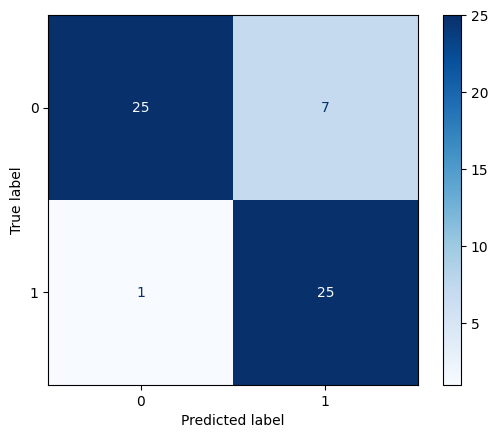

In [173]:
#plots Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap="Blues")

#### Hyperparameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV instance with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8739130434782609
Test Accuracy: 0.8275862068965517


In [194]:
grid_search.best_estimator_

RandomForestClassifier(max_features='auto', n_estimators=300)

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [180]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [181]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_res, y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [182]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [203]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    precision = precision_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("Precision = {:0.2f}%.".format(precision))
    
    return accuracy, precision

In [206]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Precision = 1.00%.


### We got our final Random Forest Model with 100% accuracy and Precision score as 1.